In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import util
from pathlib import Path
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from class_manipulates_path import ManipulatePath
from class_preprocessing_refactor import Preprocessing
from class_format_data import FormatData
util.init()

'Módulo util importado com sucesso.'

In [2]:
def plot_variable(df, column_name):
    """
    Plota um gráfico de dispersão para uma variável de um DataFrame.

    Parâmetros:
        - df: DataFrame pandas contendo os dados.
        - column_name: Nome da coluna que você deseja plotar.
        - intervalos: Lista de intervalos para plotar linhas verticais.
    """
    plt.figure(figsize=(20, 10))
    plt.scatter(df.index.values, df[column_name].values, color='darkcyan', alpha=0.5)
    plt.xlabel('Índice')
    plt.ylabel(column_name)
    plt.title(f'Gráfico de dispersão para a variável "{column_name}"')

    plt.show()

In [3]:
def class_and_file_generator(data_path, real=False, simulated=False, drawn=False):
    for class_path in data_path.iterdir():
        if class_path.is_dir():
            class_code = int(class_path.stem)
            for instance_path in class_path.iterdir():
                if (instance_path.suffix == '.csv'):
                    if (simulated and instance_path.stem.startswith('SIMULATED')) or \
                       (drawn and instance_path.stem.startswith('DRAWN')) or \
                       (real and (not instance_path.stem.startswith('SIMULATED')) and \
                       (not instance_path.stem.startswith('DRAWN'))):
                        yield class_code, instance_path

In [4]:
def plot_two_variables(df, var1, var2, binary_column=None):
    """
    Plota um gráfico de dispersão para duas variáveis de um DataFrame, colorindo os pontos conforme uma coluna binária, se fornecida.

    Parâmetros:
        - df: DataFrame pandas contendo os dados.
        - var1: Nome da primeira variável (eixo x).
        - var2: Nome da segunda variável (eixo y).
        - binary_column: Nome da coluna binária usada para colorir os pontos (opcional).
    """
    plt.figure(figsize=(10, 6))

    if binary_column is not None:
        # Obtendo os valores únicos da coluna binária
        classes = df[binary_column].unique()

        # Criando um mapeamento de classe para cor
        colors = {cls: plt.cm.tab10(i) for i, cls in enumerate(classes)}

        # Colorindo os pontos de acordo com as classes
        for cls in classes:
            df_cls = df[df[binary_column] == cls]
            plt.scatter(df_cls[var1], df_cls[var2], color=colors[cls], label=cls, alpha=0.5)
        
        plt.legend(title=binary_column)
    else:
        plt.scatter(df[var1], df[var2], alpha=0.5)

    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Gráfico de Dispersão: {var1} vs {var2}')
    plt.grid(True)
    plt.show()

In [5]:
def plot_variavel_e_histograma(dataframe, nome_coluna):
    # Verifica se a coluna existe no DataFrame
    if nome_coluna not in dataframe.columns:
        print("A coluna especificada não existe no DataFrame.")
        return
    
    # Plota a variável ao longo do tempo
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    dataframe[nome_coluna].plot()
    plt.title("Variação ao longo do tempo")
    plt.xlabel("Índice")
    plt.ylabel(nome_coluna)
    
    # Plota o histograma da variável
    plt.subplot(1, 2, 2)
    dataframe[nome_coluna].hist()
    plt.title("Histograma")
    plt.xlabel(nome_coluna)
    plt.ylabel("Frequência")
    
    plt.tight_layout()
    plt.show()

In [6]:
def kmeans_two_variables(df, var1, var2, n_clusters=3):
    """
    Aplica o algoritmo K-means para agrupar duas variáveis de um DataFrame.

    Parâmetros:
        - df: DataFrame pandas contendo os dados.
        - var1: Nome da primeira variável.
        - var2: Nome da segunda variável.
        - n_clusters: Número de clusters (padrão é 3).
    """
    # Seleciona as duas variáveis
    X = df[[var1, var2]]

    # Aplica o algoritmo K-means
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    # Obtém as coordenadas dos centroides
    centroids = kmeans.cluster_centers_

    # Plota os pontos e os centroides
    plt.figure(figsize=(10, 6))
    plt.scatter(X[var1], X[var2], c=kmeans.labels_, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'K-means: {var1} vs {var2}')
    plt.grid(True)
    plt.show()

In [7]:
manipulate_path = ManipulatePath()

preprocessing = Preprocessing()

format_data = FormatData()

path_raw_data = manipulate_path.get_path_raw_data()

abnormal_classes_codes = [1, 2, 5, 6, 7, 8]

In [8]:
# Gets all real instances but maintains only those with any type of undesirable event
real_instances = pd.DataFrame(class_and_file_generator(path_raw_data, 
                                                       real=True,
                                                       simulated=False, 
                                                       drawn=False),
                              columns=['class_code', 'instance_path'])
real_instances = real_instances.loc[real_instances.iloc[:,0].isin(abnormal_classes_codes)].reset_index(drop=True)

In [9]:
real_instances[real_instances["class_code"] == 1]["instance_path"][0]

WindowsPath('c:/Users/marce/Documents/MEGA/0_PUC-Rio/2_Periodo/2_Data Science/2_Trabalho_Final/3_3W/1_data/1_raw_data/1/WELL-00001_20140124093303.csv')

In [10]:
falha = 1

file_paths = real_instances[real_instances["class_code"] == falha]["instance_path"].values
df_output = pd.DataFrame()

for file_path in file_paths:
    df_data = pd.read_csv(file_path)

    df_data = FormatData.set_index_dataframe(df_data=df_data,
                                         column_name="timestamp")
    quantidade = (df_data['class'] == falha).sum()
    print(f"1 se repete {quantidade}")
    print(f"Index min {df_data.index.min()} index max {df_data.index.max()}")
    
    df_output = pd.concat([df_output, df_data], axis=0)

1 se repete 4603
Index min 2014-01-24 09:33:03 index max 2014-01-25 01:47:30
1 se repete 2929
Index min 2014-01-26 16:19:44 index max 2014-01-26 23:00:00
1 se repete 1205
Index min 2017-07-31 18:09:30 index max 2017-08-01 20:45:00
1 se repete 861
Index min 2017-07-31 22:04:32 index max 2017-08-01 20:19:27
1 se repete 819
Index min 2018-06-17 20:02:57 index max 2018-06-18 11:00:00


In [11]:
df_output

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,
2014-01-24 09:33:03,0.000000e+00,18433410.0,116.8718,9397031.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:04,0.000000e+00,18433410.0,116.8718,9397031.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:05,0.000000e+00,18433410.0,116.8718,9397032.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:06,0.000000e+00,18433410.0,116.8718,9397033.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:07,0.000000e+00,18433410.0,116.8718,9397033.0,74.80031,-300917.8,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-06-18 10:59:56,-1.180116e+42,20647810.0,118.2188,10136700.0,71.27952,4108865.0,NaN,0.0,1.0
2018-06-18 10:59:57,-1.180116e+42,20647810.0,118.2194,10137410.0,71.27949,4108866.0,NaN,0.0,1.0
2018-06-18 10:59:58,-1.180116e+42,20647810.0,118.2201,10138120.0,71.27946,4108866.0,NaN,0.0,1.0


In [12]:
df_output = df_output[~df_output.index.duplicated()]
df_output.shape

(232040, 9)

In [13]:
for column_name in df_output.columns:
    percent = Preprocessing.check_null_dataframe(df_data=df_output, column_name=column_name)
    print(f"{column_name} null data is {percent}")

P-PDG null data is 0.0
P-TPT null data is 0.0
T-TPT null data is 0.0
P-MON-CKP null data is 0.0
T-JUS-CKP null data is 0.0
P-JUS-CKGL null data is 0.0
T-JUS-CKGL null data is 100.0
QGL null data is 0.0
class null data is 4.459575935183589


In [14]:
df_preprocessing = df_output.drop(columns=["T-JUS-CKGL"])
df_preprocessing

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
timestamp,,,,,,,,
2014-01-24 09:33:03,0.000000e+00,18433410.0,116.8718,9397031.0,74.80031,-300917.8,0.0,0.0
2014-01-24 09:33:04,0.000000e+00,18433410.0,116.8718,9397031.0,74.80031,-300917.8,0.0,0.0
2014-01-24 09:33:05,0.000000e+00,18433410.0,116.8718,9397032.0,74.80031,-300917.8,0.0,0.0
2014-01-24 09:33:06,0.000000e+00,18433410.0,116.8718,9397033.0,74.80031,-300917.8,0.0,0.0
2014-01-24 09:33:07,0.000000e+00,18433410.0,116.8718,9397033.0,74.80031,-300917.8,0.0,0.0
...,...,...,...,...,...,...,...,...
2018-06-18 10:59:56,-1.180116e+42,20647810.0,118.2188,10136700.0,71.27952,4108865.0,0.0,1.0
2018-06-18 10:59:57,-1.180116e+42,20647810.0,118.2194,10137410.0,71.27949,4108866.0,0.0,1.0
2018-06-18 10:59:58,-1.180116e+42,20647810.0,118.2201,10138120.0,71.27946,4108866.0,0.0,1.0


In [15]:
df_preprocessing = df_preprocessing.dropna()
df_preprocessing.shape

(221692, 8)

In [16]:
for column_name in df_preprocessing.columns:
    percent = Preprocessing.check_column_low_variance(df_data=df_preprocessing, column_name=column_name)
    print(f"{column_name} low variance is {percent}")

P-PDG low variance is 0
P-TPT low variance is 0
T-TPT low variance is 0
P-MON-CKP low variance is 0
T-JUS-CKP low variance is 0
P-JUS-CKGL low variance is 0
QGL low variance is 1
class low variance is 0


In [18]:
df_preprocessing = df_preprocessing.drop(columns=["P-PDG", "P-JUS-CKGL", "QGL"])
df_preprocessing

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
timestamp,,,,,
2014-01-24 09:33:03,18433410.0,116.8718,9397031.0,74.80031,0.0
2014-01-24 09:33:04,18433410.0,116.8718,9397031.0,74.80031,0.0
2014-01-24 09:33:05,18433410.0,116.8718,9397032.0,74.80031,0.0
2014-01-24 09:33:06,18433410.0,116.8718,9397033.0,74.80031,0.0
2014-01-24 09:33:07,18433410.0,116.8718,9397033.0,74.80031,0.0
...,...,...,...,...,...
2018-06-18 10:59:56,20647810.0,118.2188,10136700.0,71.27952,1.0
2018-06-18 10:59:57,20647810.0,118.2194,10137410.0,71.27949,1.0
2018-06-18 10:59:58,20647810.0,118.2201,10138120.0,71.27946,1.0


In [19]:
contagem_classes = df_preprocessing['class'].value_counts()

# Calcular a porcentagem de cada classe
porcentagem_classes = contagem_classes / len(df_preprocessing) * 100
porcentagem_classes

class
0.0      66.432257
101.0    29.257258
1.0       4.310485
Name: count, dtype: float64

In [169]:
#df_preprocessing["class"] = df_preprocessing["class"].replace(101, 1)

In [20]:
contagem_classes = df_preprocessing['class'].value_counts()

# Calcular a porcentagem de cada classe
porcentagem_classes = contagem_classes / len(df_preprocessing) * 100
porcentagem_classes

class
0.0      66.432257
101.0    29.257258
1.0       4.310485
Name: count, dtype: float64

In [21]:
df_preprocessing.columns

Index(['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'class'], dtype='object')

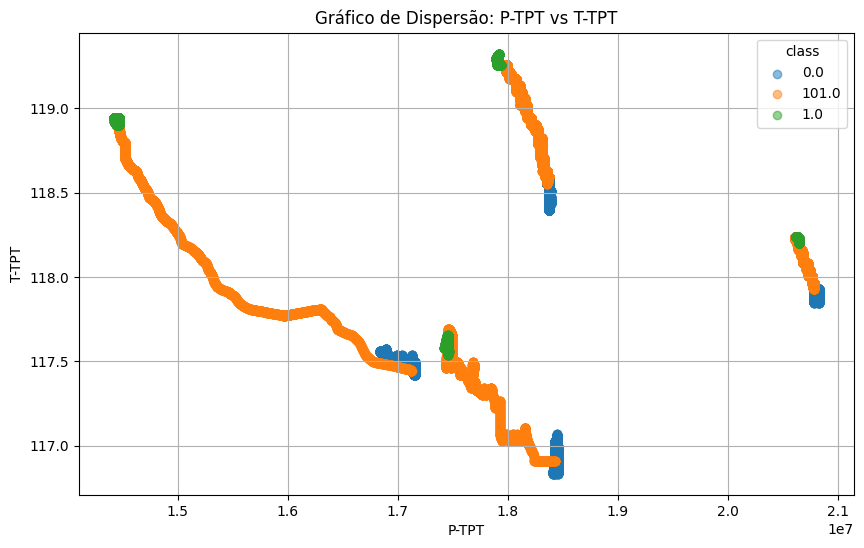

In [22]:
plot_two_variables(df_preprocessing, 'P-TPT', 'T-TPT', binary_column="class")

In [23]:
def kmeans_six_variables(X_pca, n_clusters=3):
    """
    Aplica o algoritmo K-means para agrupar seis variáveis de um DataFrame após a redução de dimensionalidade com PCA.

    Parâmetros:
        - df: DataFrame pandas contendo os dados.
        - n_clusters: Número de clusters (padrão é 3).
    """
    # Aplica PCA para reduzir a dimensionalidade para 2 componentes
    # Aplica o algoritmo K-means
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_pca)

    # Plota os grupos
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, color='red')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('K-means Clustering após Redução de Dimensionalidade')
    plt.grid(True)
    plt.show()

c:\Users\marce\Documents\0_python_env\venv3WPetrobras\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


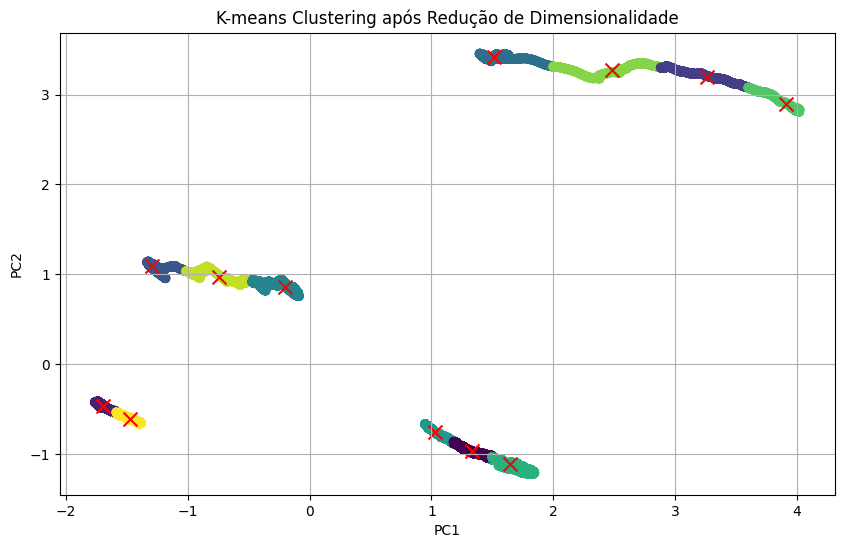

In [28]:
pca = PCA(n_components=2)
scaler = StandardScaler()
X = scaler.fit_transform(df_preprocessing.drop(columns="class"))
X_pca = pca.fit_transform(X)
kmeans_six_variables(X_pca, n_clusters=12)

In [25]:
df_pca = pd.DataFrame(X_pca, columns=["COMP_1", "COMP_2"])
df_pca["class"] = df_preprocessing["class"].values

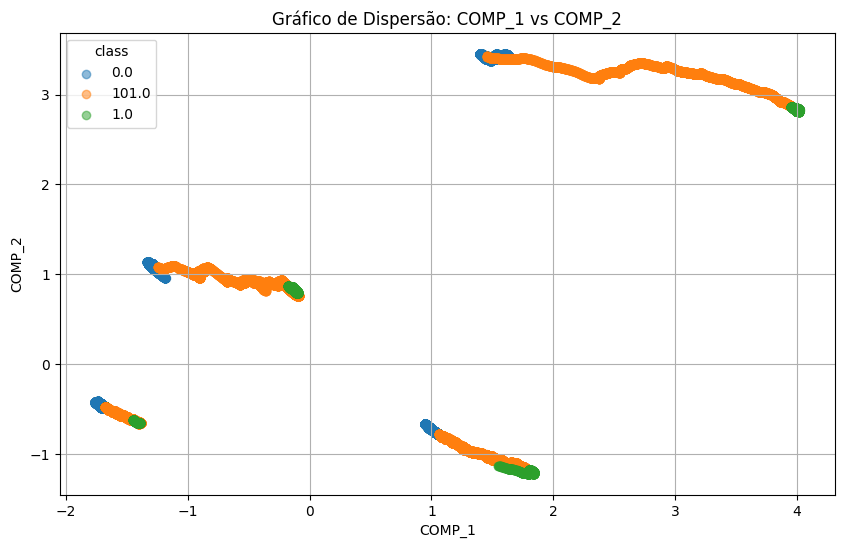

In [26]:
plot_two_variables(df_pca, 'COMP_1', 'COMP_2', binary_column="class")

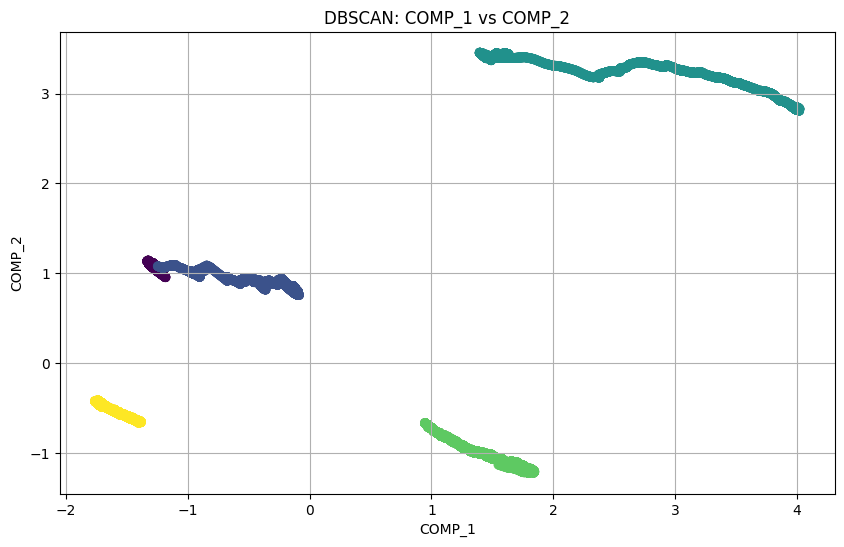

In [29]:
# Aplica o algoritmo DBSCAN
eps=0.01
min_samples=4
dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
dbscan.fit(df_pca.drop(columns=["class"]))

# Plota os pontos
plt.figure(figsize=(10, 6))
plt.scatter(df_pca["COMP_1"], df_pca["COMP_2"], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.xlabel("COMP_1")
plt.ylabel("COMP_2")
plt.title(f'DBSCAN: {"COMP_1"} vs {"COMP_2"}')
plt.grid(True)
plt.show()

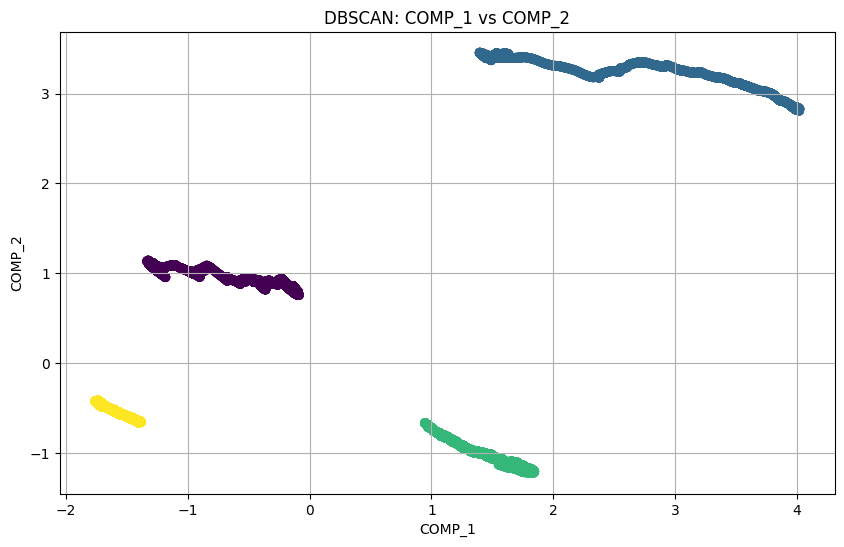

In [30]:
# Aplica o algoritmo DBSCAN
# Esse algoritmo conseguiu separar em duas classes muito bem!!!!!!
eps=0.1
min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
dbscan.fit(df_pca.drop(columns=["class"]))

# Plota os pontos
plt.figure(figsize=(10, 6))
plt.scatter(df_pca["COMP_1"], df_pca["COMP_2"], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.xlabel("COMP_1")
plt.ylabel("COMP_2")
plt.title(f'DBSCAN: {"COMP_1"} vs {"COMP_2"}')
plt.grid(True)
plt.show()

# Conclusão

Não é possível usar todos os dados da falha 1 para agrupar tudo de uma vez

Será necessário testar com os dados de cada poço